# Google Play Data Analysis

## Read Data

In [1]:
import pandas as pd
import numpy as np
datafile = "googleplaystore.csv"
df = pd.read_csv(datafile)

- only the Rating column is numerical

## Data Preprocessing

#### 1. convert number of reviews to int

In [2]:
# def one_hot_encoder(array):
#     from sklearn.preprocessing import LabelEncoder
#     encoder = LabelEncoder()
#     encoder.fit(array)
#     coded_array = encoder.transform(array)
#     n = len(coded_array)
#     n_labels = len(np.unique(coded_array))
#     one_hot = np.zeros((n,n_labels))
#     one_hot[np.arange(n), coded_array] = 1
#     return one_hot

# category_df = pd.DataFrame(one_hot_encoder(df['Category']))

In [3]:
# df['Reviews'].astype(int) #error in direct conversion

- since there is an error in direct conversion, there must be entries with non-integer values

In [4]:
import re
p = re.compile('[a-zA-Z]+')
t = df['Reviews'].apply(lambda x: p.search(str(x))!=None)
np.where(t)

(array([10472], dtype=int64),)

- there is one entry with a non-integer value at row 10372

In [5]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

- we see that there is no category for this app, and all cells have been shifted one column left
- we went to https://play.google.com/store/apps/details?id=com.lifemade.internetPhotoframe to find the actual category and updated the original data

In [6]:
df.loc[10472] = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', 1.9, '19', '3.0M', '1000+', 
                 'Free', '0', 'Everyone', 'NaN', 'February 11, 2018', '1.0.19', '4.0 and up']

- now we can convert number of reviews to int successfully

In [7]:
df['Reviews'] = df['Reviews'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int32
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


#### 2. convert size to int

- remove ',' and 'M', 'k' from app size and convert to common unit Megabyte (divide k by 1000)

In [8]:
df['Size'] = df['Size'].apply(lambda x: re.sub(',*M*','',str(x)))
df['Size'] = df['Size'].apply(lambda x: float(re.sub('k*','',str(x)))/1000 if 'k' in str(x) else x)

- remove apps with variable size and save in new df for future use

In [9]:
p = re.compile('[0-9.]+')
non_num_df = df['Size'].apply(lambda x: p.search(str(x))==None)
apps_with_var_size = df[non_num_df]
print(len(apps_with_var_size))
apps_with_var_size.head()

1695


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


- disinclude apps with var size, and convert convert app size to float

In [10]:
df = df[non_num_df==False]
df['Size'] = df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null object
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int32(1), object(10)
memory usage: 964.6+ KB


#### 3. convert num of installs to int

In [11]:
df['Installs'] = df['Installs'].apply(lambda x: re.sub(',*\+*','',str(x)))
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null int32
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int32(2), object(9)
memory usage: 928.9+ KB


#### 4. convert price to float

In [12]:
df['Price'] = df['Price'].apply(lambda x: str(x).strip('$'))
df['Price'] = df['Price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int32
Size              9146 non-null float64
Installs          9146 non-null int32
Type              9146 non-null object
Price             9146 non-null float64
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(3), int32(2), object(8)
memory usage: 928.9+ KB


# Prediction Model

<li>Data Preprocessing

In [13]:
df = df.dropna(axis=0,how='any')

In [15]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7724.000000,7.724000e+03,7724.000000,7.724000e+03,7724.000000
mean,4.173641,2.948601e+05,22.967871,8.422980e+06,1.128023
std,0.545217,1.863816e+06,23.449212,5.015426e+07,17.406914
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,4.000000,1.070000e+02,5.300000,1.000000e+04,0.000000
50%,4.300000,2.330000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,3.904550e+04,33.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,400.000000


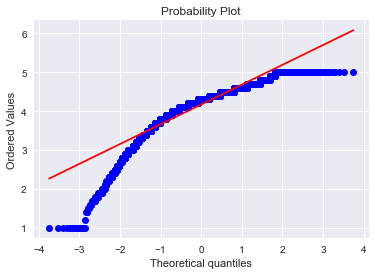

In [21]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(df['Rating'], dist="norm", plot=pylab)
pylab.show()

In [28]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.079815,0.084002,0.052724,-0.021261
Reviews,0.079815,1.000000,0.240388,0.626189,-0.010182
Size,0.084002,0.240388,1.000000,0.162717,-0.026264
Installs,0.052724,0.626189,0.162717,1.000000,-0.010851
Price,-0.021261,-0.010182,-0.026264,-0.010851,1.000000


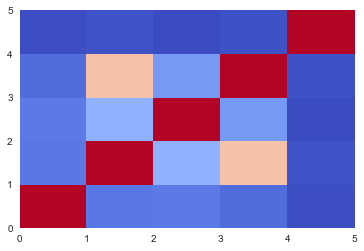

In [29]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

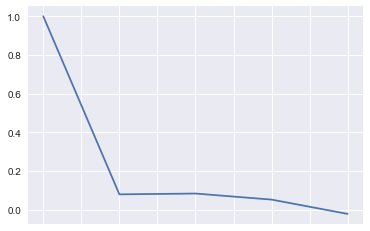

In [32]:
df.corr()['Rating'].plot()

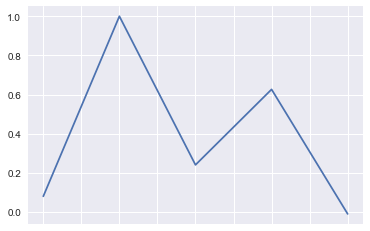

In [33]:
df.corr()['Reviews'].plot()

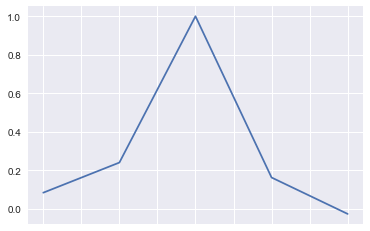

In [34]:
df.corr()['Size'].plot()

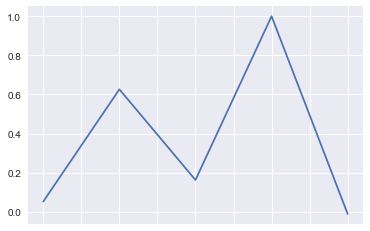

In [36]:
df.corr()['Installs'].plot()

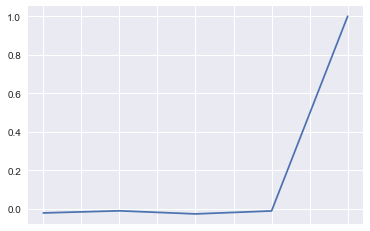

In [37]:
df.corr()['Price'].plot()

In [126]:
rating_bin = df['Rating'].apply(lambda x: 1 if x>4.5 else 0)
sum(rating_bin)/len(rating_bin)

0.21206628689798032

In [391]:
from sklearn.model_selection import train_test_split
# df_num = pd.concat([rating_bin,df['Reviews'],df['Size'],df['Installs'],df['Price']],axis=1)
df_num = pd.concat([rating_bin,df['Reviews'],df['Installs']],axis=1)
# df_num = pd.concat([rating_bin,df['Installs']],axis=1)
train, test = train_test_split(df_num, test_size = 0.3) #splits randomly
x_train = train.iloc[0:,1:]
y_train = train['Rating']
x_test = test.iloc[0:,1:]
y_test = test['Rating']
# y_train


In [392]:
from sklearn import linear_model #import model
model = linear_model.LinearRegression() #create model obj (may include hyperparam)
#hyperparam: copy_X=True, fit_intercept=True, n_jobs=1, normalize=False
model.fit(x_train,y_train) #fit model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [393]:
testing_predictions  = model.predict(x_test)
testing_predictions

array([0.21859481, 0.21858841, 0.21326995, ..., 0.21859155, 0.21857005,
       0.21792566])

In [394]:
def get_classification(predictions,threshold):
    classes = np.zeros_like(testing_predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

thresh = 0.22
x = get_classification(testing_predictions,thresh)
x

array([0., 0., 0., ..., 0., 0., 0.])

In [395]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,get_classification(testing_predictions,thresh))
# y_test

array([[1796,   57],
       [ 438,   27]], dtype=int64)

In [396]:
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,thresh)).ravel()
print(tn, fp, fn, tp)

1796 57 438 27


In [397]:
tpr = tp/(tp+fn)
print("Percentage of 4.5 correctly identified as 4.5 apps:",tpr)

Percentage of 4.5 correctly identified as 4.5 apps: 0.05806451612903226


In [398]:
tnr = tn/(tn+fp)
print(tnr)

0.9692390717754992


In [399]:
precision = tp/(tp+fp)
print(precision)

0.32142857142857145


In [400]:
f = precision*tpr/(precision+tpr)*2
print(f)

0.09836065573770492


In [401]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.7864538395168249


In [402]:
misclassification_rate = (fp + fn)/(tp+fp+tn+fn)
print(misclassification_rate)

0.21354616048317515


In [403]:
def c_m_analysis(true,pred,threshold):
    tn, fp, fn, tp = confusion_matrix(true,get_classification(pred,threshold)).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = 2*precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as 4.5 are 4.5 apps"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of actual 4.5 apps identified"%(recall))
    print("False Positive Rate:\t\t%1.2f proportion of less than 4.5 identified as 4.5"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))

c_m_analysis(y_test,testing_predictions,0.222)

Precision:			0.34 identified as 4.5 are 4.5 apps
Recall/TPR:			0.05 proportion of actual 4.5 apps identified
False Positive Rate:		0.02 proportion of less than 4.5 identified as 4.5
f-score:			0.10 tradeoff between precision and recall
Accuracy:			0.79 how well the model has classified


In [404]:
c_m_analysis(y_test,testing_predictions,0.25)

Precision:			0.33 identified as 4.5 are 4.5 apps
Recall/TPR:			0.01 proportion of actual 4.5 apps identified
False Positive Rate:		0.01 proportion of less than 4.5 identified as 4.5
f-score:			0.10 tradeoff between precision and recall
Accuracy:			0.80 how well the model has classified


In [405]:
c_m_analysis(y_test,testing_predictions,0.75)

Precision:			1.00 identified as 4.5 are 4.5 apps
Recall/TPR:			0.00 proportion of actual 4.5 apps identified
False Positive Rate:		0.00 proportion of less than 4.5 identified as 4.5
f-score:			0.11 tradeoff between precision and recall
Accuracy:			0.80 how well the model has classified


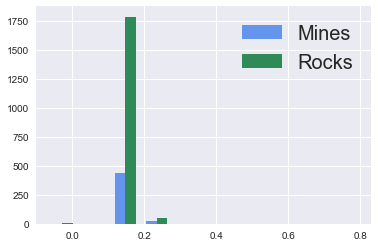

In [406]:
mines = list()
rocks = list()
actual = np.array(y_test)
for i in range(len(y_test)):
    
    if actual[i]:
        mines.append(testing_predictions[i])
    else:
        rocks.append(testing_predictions[i])
df_m = pd.DataFrame(mines)
df_r = pd.DataFrame(rocks)
fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(df_m)
b_heights, b_bins = np.histogram(df_r, bins=a_bins)
width = (a_bins[1] - a_bins[0])/3
mines_bars = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
rocks_bars = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
plt.legend([mines_bars,rocks_bars], ["Mines", "Rocks"], loc='upper right', prop={'size':20})


In [407]:
from sklearn.metrics import roc_curve, auc

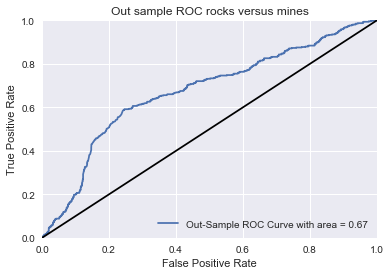

In [408]:
#training_predictions = model.predict(x_train)
#(fpr, tpr, thresholds) = roc_curve(y_train,training_predictions)

testing_predictions = model.predict(x_test)
(fpr, tpr, thresholds) = roc_curve(y_test,testing_predictions)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()
#diagonal line: random guessing
#to see whether model is stable, i.e. small change in threshold doesn't cause large jump in predic
#higher area under curve: better prediction (79% of the box)

Text(0.5,1,'2-class Precision-Recall curve: AP=0.36')

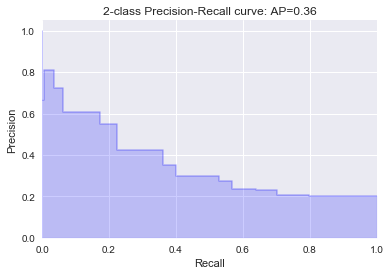

In [383]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

#precision, recall, thresholds = precision_recall_curve(y_train, training_predictions)
#average_precision = average_precision_score(y_train, training_predictions)


precision, recall, thresholds = precision_recall_curve(y_test, testing_predictions)
average_precision = average_precision_score(y_test, testing_predictions)
#average precision: precision*changeofprecision(from prev node)???

step_kwargs = ({'step' : 'post'})

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
#tradeoff between precision and recall until a sensible threshold

<li>convert category to int

In [409]:
category_dict = {}
category_num = 0
for category in df['Category'].unique():
    category_dict[category] = category_num
    category_num += 1
    

df['Category_num'] = df['Category'].apply(lambda x: str(category_dict[x]))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num,Install_log,Reviews_log,Popularity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,9.210340,5.068904,4.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,13.122363,6.874198,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,15.424948,11.379508,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,17.727534,12.281384,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,11.512925,6.874198,4.3
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,0,10.819778,5.117994,4.4
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,0,10.819778,5.181784,3.8
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,0,13.815511,10.513661,4.1
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0,13.815511,9.531771,4.4
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,0,9.210340,4.795791,4.7


<li>get dummies

In [385]:
category_df = df['Category_num'].str.get_dummies()

<li>log

In [386]:
df['Install_log'] = np.log(df['Installs'])

In [387]:
df['Reviews_log'] = np.log(df['Reviews'])

<li>identify input and output

In [388]:
X = df[['Size', 'Price']].join(category_df)
X = X.dropna(axis=0,how='any')
df['Popularity'] = df['Rating'] #+ df['Install_log'] + df['Reviews_log']  # weights
Y = df['Popularity']

<li>split into train set and test set

In [389]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=1)

<li>data normalization

In [390]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
y_mean = Y_train.mean(axis=0)
y_std = Y_train.std(axis=0)
Y_train = (Y_train - y_mean) / y_std
Y_test = (Y_test - y_mean) / y_std

In [34]:
X[3434:3443]

,Size,Price,0,1,10,11,12,13,14,15,...,3,30,31,32,4,5,6,7,8,9
4850,24.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4851,4.3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4852,48.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4853,2.3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4854,13.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4855,7.6,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4856,99.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4857,22.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4858,12.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<li>build a model

In [35]:
# !pip3 install tensorflow

In [36]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(32, activation=tf.nn.relu,
                           input_shape=(X_train.shape[1],)),
        #keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae'])
    return model

model = build_model()
#model.fit(X_train, Y_train, epochs=80, batch_size=16, verbose=0)
model.fit(X_train,Y_train,validation_split=0.2,epochs=80, batch_size=16, verbose=0)
score = model.evaluate(X_test,Y_test)
print('score: ',score)
# k_fold = KFold(n_splits=3)
# scores = []
# for train, test in k_fold.split(X, Y):
#     s_train = train[0]
#     e_train = train[-1]+1
#     s_test = test[0]
#     e_test = test[-1]+1
#     x_train = X[s_train:e_train]
#     x_test = X[s_test:e_test]
#     y_train = Y[s_train:e_train]
#     y_test = Y[s_test:e_test]
#     model.fit(x_train,y_train, epochs=150, batch_size=10, verbose=0)
#     score = model.evaluate(x_test,y_test)
#     scores.append(score[0])
#     print('score: ', score)
# print("%.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))

1931/1931 [==============================] - 0s 23us/step
score:  [0.866225887863578, 0.7838899350302136]


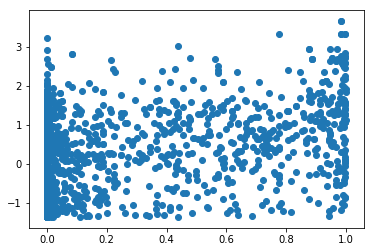

In [37]:
pre = model.predict(X_test)
plt.scatter(pre,Y_test)
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
print(linreg.intercept_)
print(linreg.coef_)

0.0013847854520669292
[ 3.55344365e-01 -2.10001461e-02 -5.94151868e+12 -6.20956327e+12
 -5.20951783e+12 -1.27286762e+13 -7.34623601e+12 -1.17158228e+13
 -6.20956327e+12 -5.94151868e+12 -1.29084817e+13 -2.27270942e+13
 -2.81979551e+13 -1.39309453e+13 -4.88528947e+12 -1.06299893e+13
 -1.05556545e+13 -1.19457714e+13 -1.21389451e+13 -9.89897240e+12
 -1.89728897e+13 -1.27889370e+13 -1.18478408e+13 -4.96837370e+12
 -5.80270756e+12 -8.97130550e+12 -8.69977898e+12 -9.89897240e+12
 -7.17921406e+12 -1.24533277e+13 -5.20951783e+12 -1.10997855e+13
 -1.04052271e+13 -8.27463759e+12 -7.45540978e+12]


In [39]:
y_pred = linreg.predict(X_test)
from sklearn import metrics

print("MSE:", metrics.mean_squared_error(Y_test, y_pred))

MSE: 0.8203278094677324


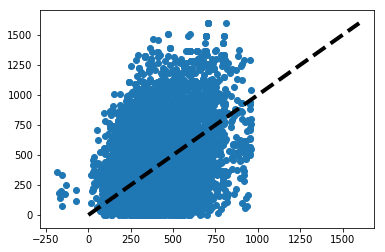

In [40]:
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
predicted = cross_val_predict(linreg,X,Y,cv=10)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.scatter(predicted, Y)
plt.show()